In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Simple Linear Regression

$ y = m*x $

In [2]:
x = np.random.randn(100)
xx = x.reshape(100, 1)

In [3]:
y = 100*x + 5 + 40*np.random.randn(100)
y_clean = 100*x + 5 #just for fun

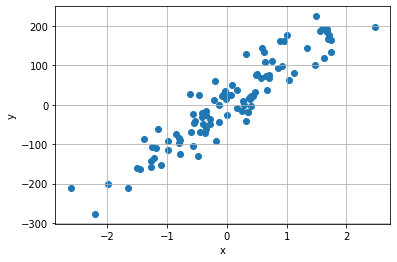

In [4]:
plt.scatter(x, y)
plt.xlabel('x'); plt.ylabel('y')
plt.grid()

In [5]:
from sklearn.linear_model import LinearRegression

### Step-1 to initialize the model

In [6]:
model = LinearRegression()

### Step-2: Model Training 

In [7]:
model.fit(xx, y)

LinearRegression()

In [8]:
yp = model.predict(xx)

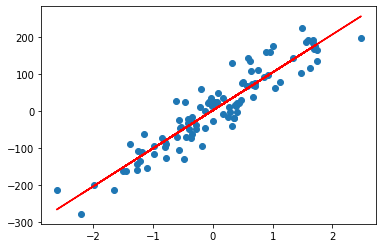

In [9]:
plt.scatter(x, y)
plt.plot(x, yp, color = "red")

In [10]:
x_new = [[2.5]]
model.predict(x_new)

array([258.87836617])

In [11]:
model.coef_, model.intercept_

(array([102.58314996]), 2.4204912813151376)

In [12]:
df_simpleReg = pd.DataFrame({'xx':x, 'y':y, 'yp':yp})

In [13]:
df_simpleReg

,xx,y,yp
0,-0.212476,11.983803,-19.375988
1,-0.347739,-15.052171,-33.251702
2,-2.609480,-211.899450,-265.268158
3,-0.283243,-35.966832,-26.635486
4,-0.853679,-73.061735,-85.152630
...,...,...,...
95,-1.389411,-87.093636,-140.109614
96,-0.398693,-48.694867,-38.478643
97,-0.601642,-70.145796,-59.297864
98,0.957301,160.983981,100.623454


### Overfitting : when machine learning learns the noise as well, noise is to be ignored, the real trend has to be captured 

### 2. Multiple Linear Regression 

In [14]:
x1 = np.random.randn(100)
x2 = np.random.randn(100) + 50


m1 = 5
m2 = 10
c = 200

y_12 = m1*x1 + m2*x2 + c

In [15]:
df_multiReg = pd.DataFrame({'X1':x1, 'X2':x2,'y':y_12})
df_multiReg

,X1,X2,y
0,2.047853,49.379161,704.030872
1,0.064229,49.488532,695.206465
2,-0.268075,50.267131,701.330937
3,0.008075,50.929736,709.337731
4,-1.465397,49.604617,688.719187
...,...,...,...
95,0.496317,51.292257,715.404157
96,-0.806963,50.380902,699.774201
97,-1.069099,51.499184,709.646345
98,-0.898530,50.987944,705.386791


In [18]:
model_2 = LinearRegression()

In [19]:
X_train_2d = df_multiReg[['X1', 'X2']] #x part
y_train_2d = df_multiReg['y'] #y part

In [20]:
model_2.fit(X_train_2d, y_train_2d)

LinearRegression()

In [21]:
yp_2d = model_2.predict(X_train_2d)

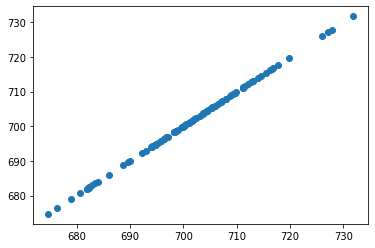

In [22]:
plt.scatter(y_train_2d, yp_2d)

In [23]:
model_2.coef_ , model_2.intercept_

(array([ 5., 10.]), 199.99999999999972)

In [24]:
model_2.predict([[10, 20]])

array([450.])

In [27]:
from sklearn.metrics import mean_squared_error as mse

In [28]:
yp_2d[:5], y_12[:5]

(array([704.03087172, 695.20646461, 701.33093679, 709.33773109,
        688.71918684]),
 array([704.03087172, 695.20646461, 701.33093679, 709.33773109,
        688.71918684]))

In [29]:
((yp_2d - y_12)**2).mean()

1.58973773975035e-26

In [30]:
mse(y_12, yp_2d)

1.58973773975035e-26

### ML application in Reservoir Engineering

In [35]:
# finding relation for porosity, water saturation and permeability
df_phik = pd.read_csv('Phik.csv', index_col =0)

### EDA

In [36]:
df_phik.head()

,Porosity,Swc,Permeability(D)
0,0.269158,0.114209,2.042529
1,0.324275,0.072078,11.639989
2,0.218003,0.101849,1.015917
3,0.211875,0.099354,0.941715
4,0.322281,0.083444,8.452433


### Descrpitive Statistics

In [37]:
df_phik.describe()

,Porosity,Swc,Permeability(D)
count,70000.000000,70000.000000,70000.000000
mean,0.250099,0.099978,2.615701
std,0.050335,0.010008,2.386541
min,0.042789,0.054212,0.000679
25%,0.216020,0.093231,1.010082
50%,0.249907,0.099990,1.936386
75%,0.284033,0.106762,3.460038
max,0.478269,0.141312,38.662256


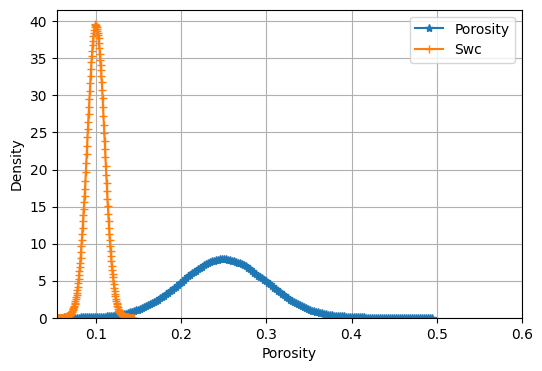

In [44]:
plt.style.use('default')
plt.figure(figsize = (6, 4))
sns.kdeplot(df_phik["Porosity"], label = "Porosity", marker = "*")
sns.kdeplot(df_phik["Swc"], label = "Swc", marker = "+")

plt.xlim(min(df_phik["Swc"]), 0.6)
plt.grid()
plt.legend(loc = "best")

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_phik[["Porosity", "Swc"]]
y = df_phik["Permeability(D)"]

In [48]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
yp_k_train = rf_model.predict(X_train)

In [55]:
yp_k_test = rf_model.predict(X_test)

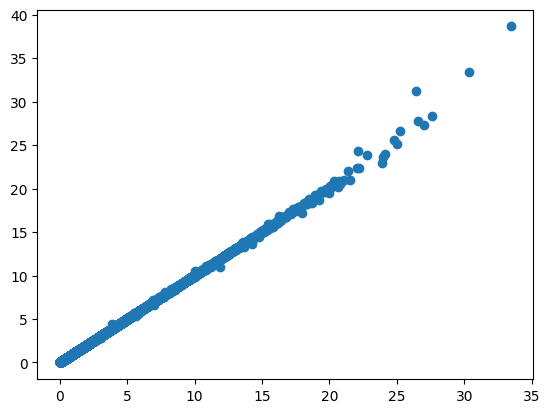

In [57]:
plt.scatter(yp_k_train, y_train)

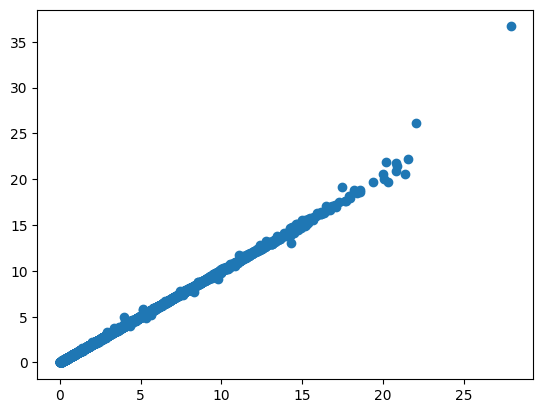

In [59]:
plt.scatter(yp_k_test, y_test)

In [60]:
mse_train = mse(y_train, yp_k_train)
mse_test = mse(y_test, yp_k_test)

In [61]:
mse_train, mse_test

(0.00168267966105623, 0.005537315149135687)